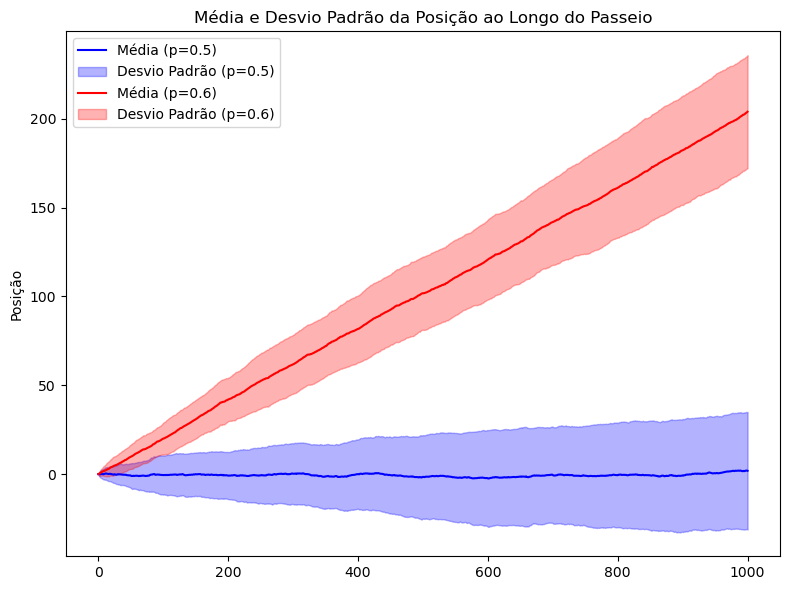

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

class PasseioAleatorio:
    def __init__(self, p, N):
        """
        Parâmetros:
        p (float): Probabilidade de movimento para a direita
        N (int): Número de passos no passeio
        """
        self.p = p
        self.N = N
    
    def função_passeio(self):
        """
        Gera um passeio aleatório usando rng.choice() e np.cumsum()
        
        Retorna:
        array: Posições do passeio aleatório
        """
        rng = np.random.default_rng()
        passos = rng.choice([1, -1], size=self.N, p=[self.p, 1-self.p])
        x = np.concatenate(([0], np.cumsum(passos)))
        return x

p = [0.5, 0.6]
num_simulacoes = 100 
tamanho_passeio = 1000

plt.figure(figsize=(8, 6))
cores = ['blue', 'red']  

for i, prob in enumerate(p):
    # Arrays para armazenar todas as posições finais de cada simulação
    todas_posicoes = np.zeros((num_simulacoes, tamanho_passeio + 1))
    
    for simulacao in range(num_simulacoes):
        valores = PasseioAleatorio(prob, tamanho_passeio)
        posicoes = valores.função_passeio()
        todas_posicoes[simulacao] = posicoes    #funcão para rodar as simulações
    
    media_posicoes = np.mean(todas_posicoes, axis=0) #média
    desvio_posicoes = np.std(todas_posicoes, axis=0) #desvio padrão
    

    passos = np.arange(tamanho_passeio + 1)
    

    plt.plot(passos, media_posicoes, color=cores[i], label=f'Média (p={prob})')
    plt.fill_between(passos, 
                    media_posicoes - desvio_posicoes, 
                    media_posicoes + desvio_posicoes, 
                    color=cores[i], alpha=0.3, 
                    label=f'Desvio Padrão (p={prob})')
    plt.ylabel('Posição')
    plt.title('Média e Desvio Padrão da Posição ao Longo do Passeio')
    plt.legend()
    
plt.tight_layout()
plt.show()